# **_Multiple Linear Regression_**

In [3]:
import pandas as pd
import numpy as np

from Regression.linear_regression import X_train, y_train

In [4]:
import random

In [5]:
data = []

for _ in range(500):
    team_name = f"Team {chr(random.randint(65, 90))}"
    season = random.randint(2010, 2022)
    wins = random.randint(50, 110)
    losses = 162 - wins
    hits = random.randint(1200, 1600)
    doubles = random.randint(200, 350)
    triples = random.randint(10, 40)
    home_runs = random.randint(100, 250)
    strikeouts = random.randint(1000, 1500)

    # Apply adjustments to create correlations
    hits_adjusted = hits + (wins - 80) * 5
    doubles_adjusted = doubles + (wins - 80) * 2
    triples_adjusted = triples + (wins - 80)
    home_runs_adjusted = home_runs + (wins - 80) * 3
    strikeouts_adjusted = strikeouts - (wins - 80) * 10

    data.append([team_name, season, wins, losses, hits_adjusted, doubles_adjusted, triples_adjusted, home_runs_adjusted, strikeouts_adjusted])

# Define column names
columns = ["Team", "Season", "Wins", "Losses", "Hits", "Doubles", "Triples", "HomeRuns", "Strikeouts"]

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

In [6]:
df.head()

,Team,Season,Wins,Losses,Hits,Doubles,Triples,HomeRuns,Strikeouts
0,Team U,2019,62,100,1474,199,15,155,1462
1,Team W,2022,82,80,1537,237,29,250,1361
2,Team E,2014,78,84,1383,206,17,109,1489
3,Team M,2019,57,105,1242,260,-5,86,1475
4,Team Q,2016,72,90,1461,310,27,167,1346


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

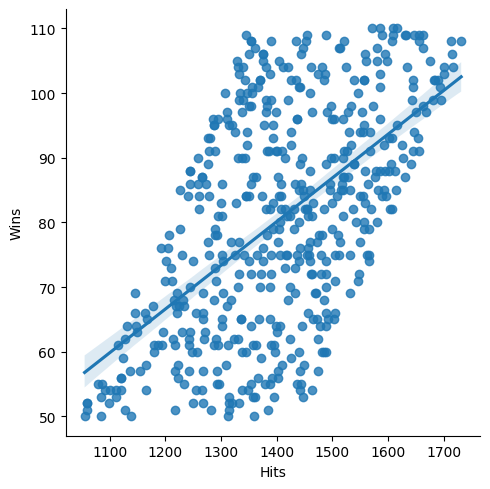

In [9]:
sns.lmplot(data=df, x='Hits', y='Wins')

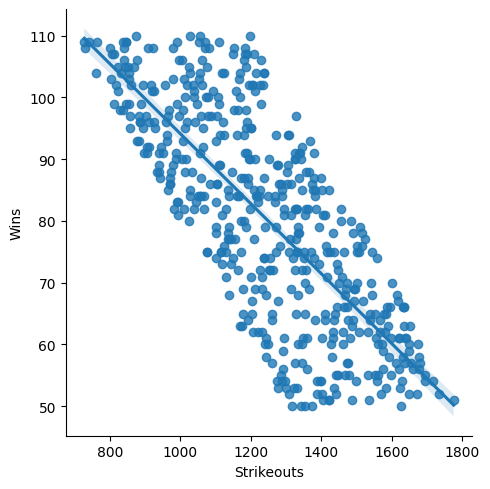

In [11]:
sns.lmplot(data=df, x='Strikeouts', y='Wins')

In [15]:
df = df.drop(columns=['Team', 'Season', 'Losses'], axis=1)

In [16]:
df.head()

,Wins,Hits,Doubles,Triples,HomeRuns,Strikeouts
0,62,1474,199,15,155,1462
1,82,1537,237,29,250,1361
2,78,1383,206,17,109,1489
3,57,1242,260,-5,86,1475
4,72,1461,310,27,167,1346


In [17]:
df.columns

Index(['Wins', 'Hits', 'Doubles', 'Triples', 'HomeRuns', 'Strikeouts'], dtype='object')

In [18]:
X = df[['Hits', 'Doubles', 'Triples', 'HomeRuns', 'Strikeouts']]

In [19]:
y = df['Wins']

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [26]:
lr.score(X_test, y_test)

0.9046885388767875

In [27]:
lr.score(X_train, y_train)

0.8840779815273574

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
y_pred = lr.predict(X_test)

In [35]:
mean_absolute_error(y_test, y_pred)

4.726756556492598

In [36]:
mean_squared_error(y_test, y_pred)

30.29680664557338

In [37]:
r2_score(y_test, y_pred)

0.9046885388767875

In [38]:
lr.coef_

array([ 0.0096157 ,  0.04030783,  0.46165233,  0.05108625, -0.01420911])

In [39]:
lr.intercept_

np.float64(52.83527394803734)